In [121]:
import numpy as np
import time
import os
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Reshape, UpSampling1D, UpSampling2D, UpSampling3D
from keras.layers import Conv2D, Conv1D, MaxPooling2D, BatchNormalization
from keras.callbacks import TensorBoard
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import backend
from scipy import misc
from keras.models import model_from_json
from skimage.transform import resize

##Modify Parameters Here
bands=3
hr_img_size=(32,32)
inpt_lr_img_size=(10,10)
sptlvarmeasure=32








backend.set_image_dim_ordering('th')
# 4. Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train=X_train.copy()
y_test=X_test.copy()
print(X_test.shape)
newximglist=[]
newx2imglist=[]
imagecounter=0
for image in X_train:
    preimage=np.swapaxes(image.copy(),0,2)
    preimage=np.swapaxes(preimage,0,1)
    newximage=misc.imresize(preimage, inpt_lr_img_size)
    newximage=np.swapaxes(newximage,0,2)
    newximage=np.swapaxes(newximage,1,2)
    newximglist.append(newximage)
    imagecounter+=1
X_train=np.array(newximglist)
for image in X_test:
    preimage=np.swapaxes(image.copy(),0,2)
    preimage=np.swapaxes(preimage,0,1)
    newximage=misc.imresize(preimage, inpt_lr_img_size)
    newximage=np.swapaxes(newximage,0,2)
    newximage=np.swapaxes(newximage,1,2)
    newx2imglist.append(newximage.copy())
    imagecounter+=1
X_test=np.array(newx2imglist)
print(X_test.shape)
print(X_train.shape)


(10000, 3, 32, 32)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:51: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


(10000, 3, 10, 10)
(50000, 3, 10, 10)


In [122]:
# 5. Preprocess input data
X_train = X_train.reshape(len(X_train), bands, inpt_lr_img_size[0],inpt_lr_img_size[1])
X_test = X_test.reshape(len(X_test), bands, inpt_lr_img_size[0],inpt_lr_img_size[1])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')[0:10] 
y_train = y_train.reshape(len(y_train), bands, hr_img_size[0],hr_img_size[1])
y_test = y_test.reshape(len(y_test), bands, hr_img_size[0],hr_img_size[1])[0:10]
y_train = y_train.astype('float32')
y_test = y_test.astype('float32') 
X_train /= 255
X_test /= 255
y_train /= 255
y_test /= 255
 
# 7. Define model architecture
model = Sequential()
ilis=inpt_lr_img_size[0]
model.add(Conv2D(filters=ilis*4/5, kernel_size=(2, 2), activation='relu', padding='valid', input_shape=(bands,ilis,ilis)))
model.add(Conv2D(filters=ilis*4/5, kernel_size=(2, 2), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=ilis*9/5, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(filters=ilis*9/5, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=ilis*16/5, kernel_size=(2, 2), activation='relu'))
model.add(Conv2D(filters=ilis*16/5, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(filters=ilis*32/5, kernel_size=(1, 1), activation='relu'))
model.add(Conv2D(filters=ilis*32/5, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(UpSampling2D((2,2)))
model.add(Conv2D(filters=ilis*32/5, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=ilis*16/5, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())

model.add(UpSampling2D((11,11)))
model.add(Conv2D(filters=ilis*9/5, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=ilis*6/20, kernel_size=(2, 2), activation='relu'))
model.add(BatchNormalization())






 
# model.add(Flatten())
# model.add(Dense(sptlvarmeasure**2*4, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense((sptlvarmeasure**2)*3, activation='softmax'))
# model.add(Reshape((3,sptlvarmeasure,sptlvarmeasure)))

# model.add(UpSampling1D(inpt_lr_img_size[0]))
# model.add(Reshape((1,1,inpt_lr_img_size[0],sptlvarmeasure)))
# model.add(UpSampling3D(bands))
# model.add(Reshape((bands,inpt_lr_img_size[0]*bands,(sptlvarmeasure*bands))))


 
# 8. Compile model
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='cosine_proximity',
              optimizer=opt,
              metrics=['accuracy'])





In [118]:
print(y_train.shape)
print(model.summary())

(50000, 3, 32, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_216 (Conv2D)          (None, 8, 9, 9)           104       
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 8, 8, 8)           264       
_________________________________________________________________
batch_normalization_97 (Batc (None, 8, 8, 8)           32        
_________________________________________________________________
dropout_82 (Dropout)         (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 18, 7, 7)          594       
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 18, 6, 6)          1314      
_________________________________________________________________
batch_normalization_98 (Batc (None, 18, 6, 6)          24

In [ ]:
if os.path.isfile('model.json'):
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
tensorboard = TensorBoard(log_dir=os.getcwd()+'/logs'.format(time.time()))
writer = tf.summary.FileWriter(os.getcwd()+'/logs').add_graph(sess.graph)
try:
  loaded_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  loaded_model.fit(X_train, y_train, 
              batch_size=16, nb_epoch=2, verbose=1, callbacks=[tensorboard])
  model=loaded_model
except (NameError, ValueError) as e:
    model.fit(X_train, y_train, 
              batch_size=32, nb_epoch=2, verbose=1, callbacks=[tensorboard])
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")




Epoch 1/2
27600/50000 [===============>..............] - ETA: 30s - loss: 52.2921 - acc: 0.0502

In [109]:
score = model.evaluate(X_test, y_test, verbose=1)
class_scores= model.predict(X_test)
print(score)

10/10 [==============================] - 1s 63ms/step
[0.20810547471046448, 0.03437500074505806]


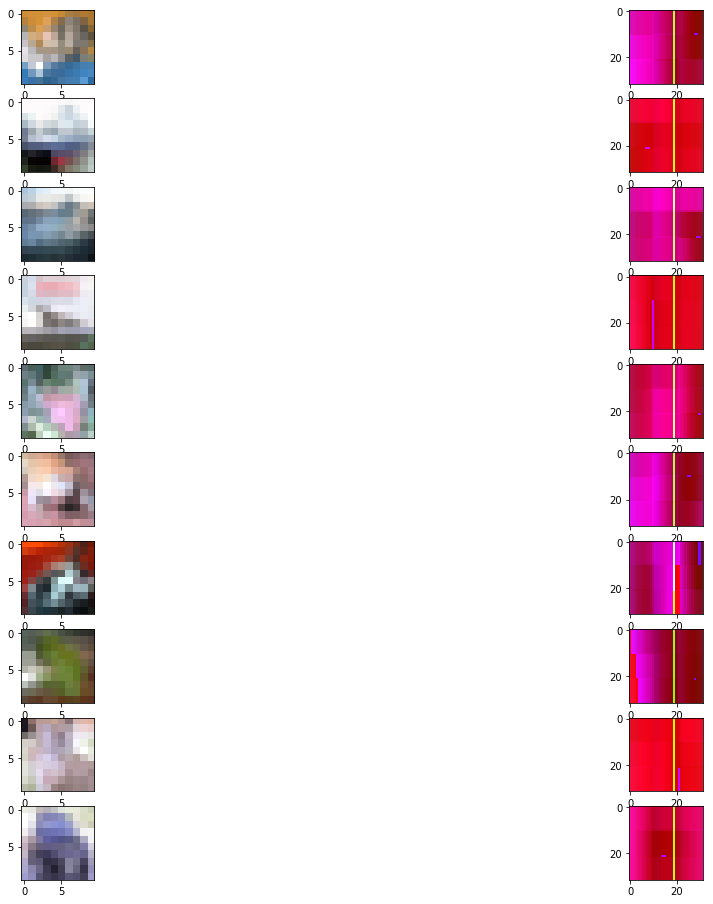

In [114]:
import matplotlib.pyplot as plt
classes=[]
for image in class_scores:
    thisclass=image
    classes.append(thisclass)
f, ax = plt.subplots(10,2, figsize=(20, 16))
axind0=0
axind1=0
imagecounter=0
for image in X_test:
    axind0=imagecounter
    emptyximage=np.zeros((10,10,3))
    emptyyimage=np.zeros((32,32,3))
    for band in range(1,4):
        newximage=image[band-1:band,0:10,0:10]
        newyimage=classes[imagecounter][band-1:band,:,:]
        emptyximage[:,:,band-1:band]=newximage.reshape((10,10,1))*(1/np.max(newximage))
        emptyyimage[:,:,band-1:band]=newyimage.reshape((32,32,1))*(1/np.max(newyimage))
    imagecounter+=1
    ax[axind0,0].imshow(emptyximage)
    ax[axind0,1].imshow(emptyyimage)
    
    
    
    